In [5]:
import numpy as np
import matplotlib.pyplot as plt

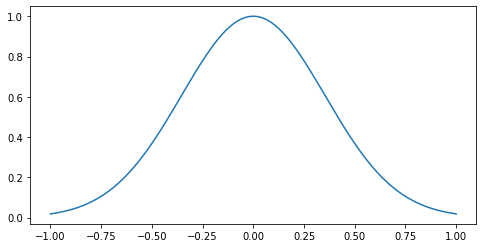

In [84]:
x = np.linspace(-1, 1, 1000)
profile = np.exp(-x**2/0.5**2)

fig = plt.figure(figsize=(8, 4))
plt.plot(x, profile)
fig.savefig('images/resource/gaussian_profile.png')

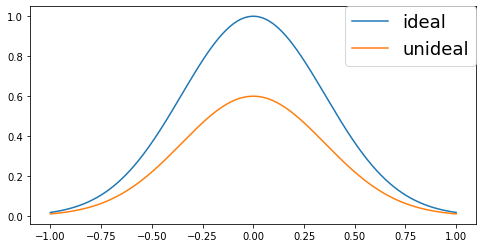

In [83]:
x = np.linspace(-1, 1, 1000)
profile = np.exp(-x**2/0.5**2)

fig = plt.figure(figsize=(8, 4))
#plt.plot(x, profile, x, label='ideal', 0.6 * profile, label='unideal')
plt.plot(x, profile, label='ideal')
plt.plot(x, 0.6 * profile, label='unideal')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
fig.savefig('images/resource/gaussian_profile_strehl.png')

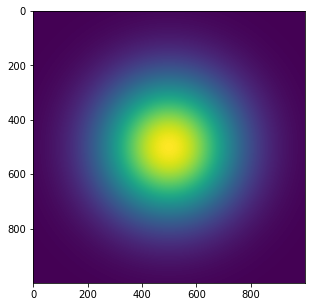

In [17]:
x = np.linspace(-1, 1, 1000)
y = x.copy()
x, y = np.meshgrid(x, y)

focus = np.exp(-(x**2 + y**2)/0.5**2)

fig = plt.figure(figsize=(5, 5))
plt.imshow(focus)
fig.savefig('images/resource/gaussian_image.png')

In [18]:
focus_sum = np.sum(focus)
half_power = 1/2 * focus_sum
half_power

97072.07634452151

In [72]:
sigma_px = 1000 * 0.5 / 2.0
K = int(0.74 * sigma_px)
print(K)
print(np.sum(focus[(500-K):(500+K), (500-K):(500+K)]))
print(2 * K)

185
97440.27173422219
370


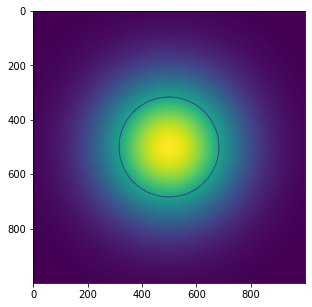

In [76]:
r = np.hypot(x, y)
focus[(0.73 * 0.5 <= r) & (r <= 0.74 * 0.5)] = 0

plt.figure(figsize=(5, 5))
plt.imshow(focus)

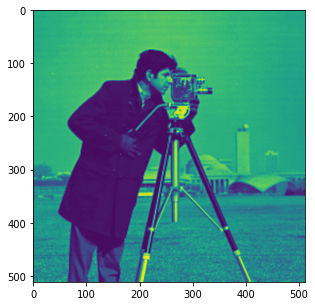

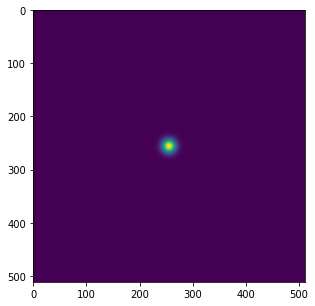

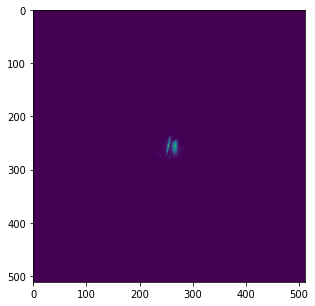

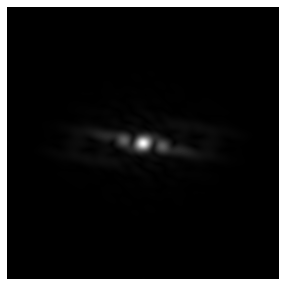

In [39]:
from PIL import Image
cameraman = Image.open('images/resource/cameraman.png').convert('L')

plt.figure(figsize=(5, 5))
plt.imshow(cameraman)

x = np.linspace(-1.0, 1.0, 512)
y = x.copy()
x, y = np.meshgrid(x, y)

gaussian_beam = np.zeros((512, 512))
gaussian_beam = np.exp(-(x**2 + y**2)/0.05**2)

plt.figure(figsize=(5, 5))
plt.imshow(gaussian_beam)

plt.figure(figsize=(5, 5))
plt.imshow(gaussian_beam * np.abs(cameraman))

diffraction = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(cameraman * gaussian_beam)))

fig = plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(np.abs(diffraction), cmap='gray')
fig.savefig('images/resource/cameraman_diffraction.png')